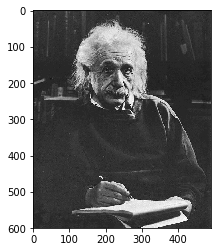

In [10]:
# Gozalez examples 3.19
# sharpen image oriented fuzzy

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import data,img_as_float
from skimage import img_as_ubyte
import math

# Read Images
img = mpimg.imread('Fig0354(a)(einstein_orig).tif')
plt.imshow(img,'gray')

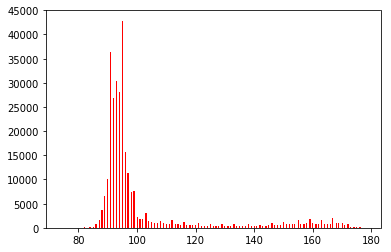

In [11]:
length = img.shape[0]
weith = img.shape[1]
count = img.reshape(length*weith,1)
# Histogram
n, bins, patches = plt.hist(count, bins=256,edgecolor='None',facecolor='red') 

In [ ]:
# histogram equalization will be added later

In [12]:
# fuzzy union
def u_dark(z):
    if z < 1.0/3:
        v = 1
    elif z > 0.5:
        v = 0
    else:
        v = -6*z + 3
    return v

def u_bright(z):
    if z > 2.0/3:
        v = 1
    elif z < 0.5:
        v = 0
    else:
        v = 6*z - 3
    return v

def u_gray(z):
    if z < 1.0/3:
        v = 0
    elif z > 2.0/3:
        v = 0
    elif (z >= 1.0/3) & (z <= 0.5):
        v = 6*z - 2
    else:
        v = -6*z + 4
    return v
img = img_as_float(img)
img1 = img
for i in range(0,length):
    for j in range(0,weith):
        z0 = img[i,j]
        v0 = u_dark(z0)*0 + u_gray(z0) * 0.5 + u_bright(z0) * 1
        v0 = v0/(u_dark(z0) + u_gray(z0) + u_bright(z0))
        img1[i,j] = v0

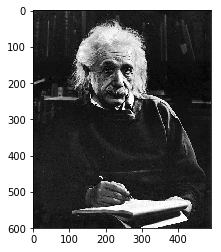

In [13]:
plt.imshow(img1,'gray')

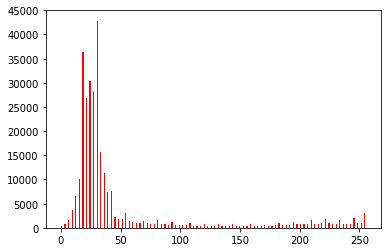

In [14]:
img1 = img_as_ubyte(img1)
count2 = img1.reshape(length*weith,1)
# Histogram
n, bins, patches = plt.hist(count2, bins=256,edgecolor='None',facecolor='red') 